In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


Đã tải mô hình Prophet thành công!
Các quận hiện có trong mô hình: ['Huyện Hòa Vang', 'Quận Cẩm Lệ', 'Quận Hải Châu', 'Quận Liên Chiểu', 'Quận Ngũ Hành Sơn', 'Quận Sơn Trà', 'Quận Thanh Khê']
Đang dự báo giá cho Huyện Hòa Vang trong 90 ngày tới...

Kết quả dự báo:
          Ngày            Quận  Giá dự báo (đơn vị/m2)  \
129 2025-04-09  Huyện Hòa Vang               -2.205306   
130 2025-04-10  Huyện Hòa Vang               -2.225418   
131 2025-04-11  Huyện Hòa Vang               -2.237631   
132 2025-04-12  Huyện Hòa Vang               -2.239591   
133 2025-04-13  Huyện Hòa Vang               -2.239801   
134 2025-04-14  Huyện Hòa Vang               -2.224386   
135 2025-04-15  Huyện Hòa Vang               -2.215540   
136 2025-04-16  Huyện Hòa Vang               -2.189741   
137 2025-04-17  Huyện Hòa Vang               -2.149140   
138 2025-04-18  Huyện Hòa Vang               -2.101067   

     Giá thấp nhất (đơn vị/m2)  Giá cao nhất (đơn vị/m2)  
129                  -2.282269       

<Figure size 1400x800 with 0 Axes>

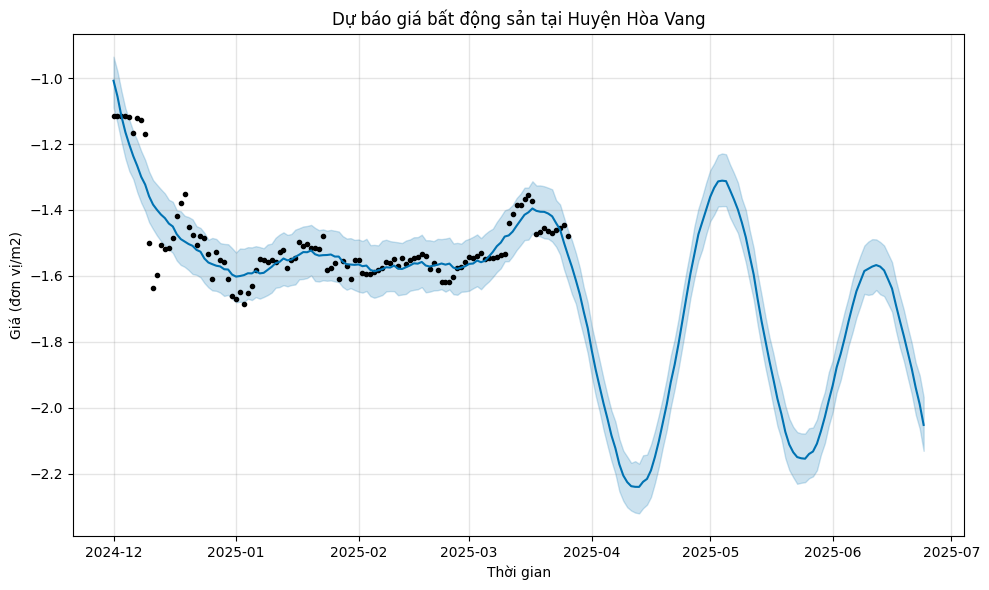

<Figure size 1400x800 with 0 Axes>

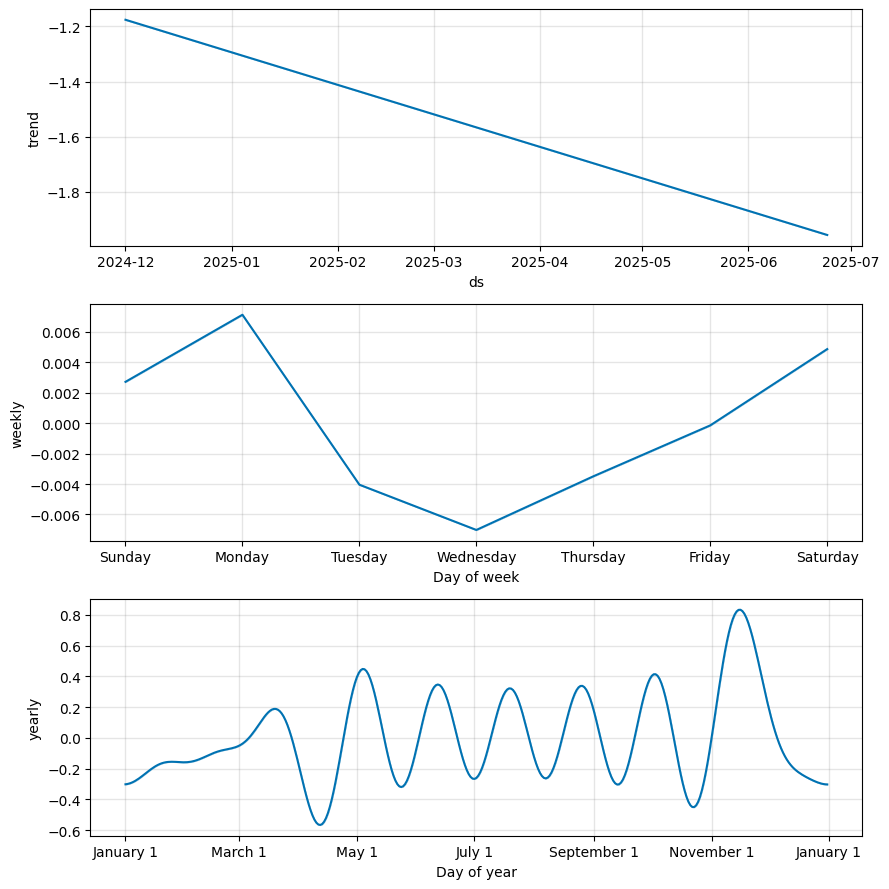

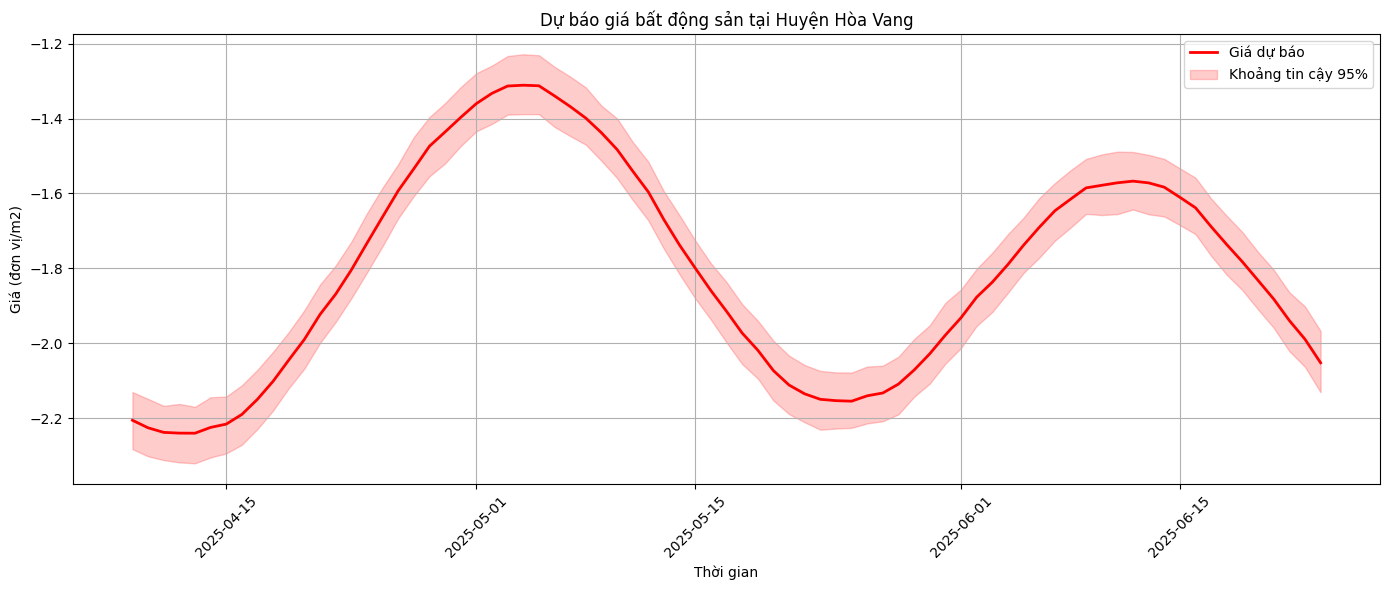


Phân tích xu hướng giá:
Giá trung bình dự báo: -1.81 đơn vị/m2
Giá thấp nhất dự báo: -2.24 đơn vị/m2
Giá cao nhất dự báo: -1.31 đơn vị/m2
Thay đổi giá trong 90 ngày: -6.96%

Giá trung bình theo tháng:
Tháng 2025-04: -1.93 đơn vị/m2
Tháng 2025-05: -1.77 đơn vị/m2
Tháng 2025-06: -1.74 đơn vị/m2


In [2]:
# Hàm dự báo giá bất động sản trong tương lai
def forecast_future_prices(district_name, model, periods=90, freq='D'):
    """
    Dự báo giá bất động sản cho một quận trong tương lai
    
    Parameters:
    district_name (str): Tên quận cần dự báo
    model (Prophet): Mô hình Prophet đã được huấn luyện
    periods (int): Số ngày cần dự báo
    freq (str): Tần suất dự báo ('D' cho ngày, 'W' cho tuần, 'M' cho tháng)
    
    Returns:
    DataFrame: Kết quả dự báo
    """
    # Tạo DataFrame tương lai để dự báo
    future = model.make_future_dataframe(periods=periods, freq=freq)
    
    # Thực hiện dự báo
    forecast = model.predict(future)
    
    # Lọc kết quả trong tương lai (từ ngày hôm nay trở đi)
    today = pd.Timestamp(datetime.now().strftime('%Y-%m-%d'))
    future_forecast = forecast[forecast['ds'] >= today].copy()
    
    # Đổi tên cột cho dễ hiểu
    result_df = pd.DataFrame({
        'Ngày': future_forecast['ds'],
        'Quận': district_name,
        'Giá dự báo (đơn vị/m2)': future_forecast['yhat'],
        'Giá thấp nhất (đơn vị/m2)': future_forecast['yhat_lower'],
        'Giá cao nhất (đơn vị/m2)': future_forecast['yhat_upper']
    })
    
    return result_df, forecast

# Hàm vẽ biểu đồ dự báo
def plot_forecast(model, forecast, district_name):
    """
    Vẽ biểu đồ dự báo giá từ mô hình Prophet
    
    Parameters:
    model (Prophet): Mô hình Prophet
    forecast (DataFrame): Kết quả dự báo từ mô hình
    district_name (str): Tên quận
    """
    plt.figure(figsize=(14, 8))
    
    # Sử dụng hàm vẽ biểu đồ tích hợp của Prophet
    fig = model.plot(forecast)
    
    # Tùy chỉnh biểu đồ
    plt.title(f'Dự báo giá bất động sản tại {district_name}')
    plt.xlabel('Thời gian')
    plt.ylabel('Giá (đơn vị/m2)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Vẽ các thành phần của mô hình
    plt.figure(figsize=(14, 8))
    fig = model.plot_components(forecast)
    plt.tight_layout()
    plt.show()

# Hàm vẽ biểu đồ dự báo tùy chỉnh
def plot_custom_forecast(result_df, district_name):
    """
    Vẽ biểu đồ dự báo giá tùy chỉnh
    
    Parameters:
    result_df (DataFrame): Kết quả dự báo
    district_name (str): Tên quận
    """
    plt.figure(figsize=(14, 6))
    
    # Vẽ đường dự báo chính
    plt.plot(result_df['Ngày'], result_df['Giá dự báo (đơn vị/m2)'], 'r-', linewidth=2, label='Giá dự báo')
    
    # Vẽ khoảng tin cậy
    plt.fill_between(
        result_df['Ngày'],
        result_df['Giá thấp nhất (đơn vị/m2)'],
        result_df['Giá cao nhất (đơn vị/m2)'],
        color='r', alpha=0.2, label='Khoảng tin cậy 95%'
    )
    
    plt.title(f'Dự báo giá bất động sản tại {district_name}')
    plt.xlabel('Thời gian')
    plt.ylabel('Giá (đơn vị/m2)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Chương trình chính
def main():
    # Đọc mô hình từ file
    try:
        with open('district_prophet_models.pkl', 'rb') as f:
            district_models = pickle.load(f)
        print("Đã tải mô hình Prophet thành công!")
    except Exception as e:
        print(f"Lỗi khi tải mô hình: {e}")
        return
    
    # Danh sách các quận có trong mô hình
    available_districts = list(district_models.keys())
    print(f"Các quận hiện có trong mô hình: {available_districts}")
    
    # Chọn quận để dự báo
    district_name = available_districts[0]  # Thay đổi đây để chọn quận khác
    
    # Lấy mô hình Prophet cho quận đã chọn
    prophet_model = district_models[district_name]
    
    # Thời gian dự báo (3 tháng = 90 ngày)
    periods = 90
    
    print(f"Đang dự báo giá cho {district_name} trong {periods} ngày tới...")
    
    # Dự báo
    result_df, forecast = forecast_future_prices(
        district_name,
        prophet_model,
        periods=periods
    )
    
    # Hiển thị kết quả
    print("\nKết quả dự báo:")
    print(result_df.head(10))  # Hiển thị 10 ngày đầu tiên
    
    # Xuất kết quả ra file CSV
    today = datetime.now().strftime('%Y-%m-%d')
    end_date = (datetime.now() + timedelta(days=periods)).strftime('%Y-%m-%d')
    csv_filename = f"{district_name}_prophet_forecast_{today}_to_{end_date}.csv"
    result_df.to_csv(csv_filename, index=False)
    print(f"\nĐã lưu kết quả dự báo vào file: {csv_filename}")
    
    # Vẽ biểu đồ
    plot_forecast(prophet_model, forecast, district_name)
    plot_custom_forecast(result_df, district_name)
    
    # Phân tích thêm - hiển thị thông tin xu hướng dự báo
    avg_price = result_df['Giá dự báo (đơn vị/m2)'].mean()
    min_price = result_df['Giá dự báo (đơn vị/m2)'].min()
    max_price = result_df['Giá dự báo (đơn vị/m2)'].max()
    
    first_price = result_df['Giá dự báo (đơn vị/m2)'].iloc[0]
    last_price = result_df['Giá dự báo (đơn vị/m2)'].iloc[-1]
    price_change = ((last_price - first_price) / first_price) * 100
    
    print("\nPhân tích xu hướng giá:")
    print(f"Giá trung bình dự báo: {avg_price:,.2f} đơn vị/m2")
    print(f"Giá thấp nhất dự báo: {min_price:,.2f} đơn vị/m2")
    print(f"Giá cao nhất dự báo: {max_price:,.2f} đơn vị/m2")
    print(f"Thay đổi giá trong {periods} ngày: {price_change:.2f}%")
    
    # Phân tích theo tháng
    result_df['Tháng'] = result_df['Ngày'].dt.to_period('M')
    monthly_avg = result_df.groupby('Tháng')['Giá dự báo (đơn vị/m2)'].mean()
    
    print("\nGiá trung bình theo tháng:")
    for month, price in monthly_avg.items():
        print(f"Tháng {month}: {price:,.2f} đơn vị/m2")

if __name__ == "__main__":
    main()